In [1]:
install.packages("igraph")
library('igraph')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




1.2.a


[1] TRUE

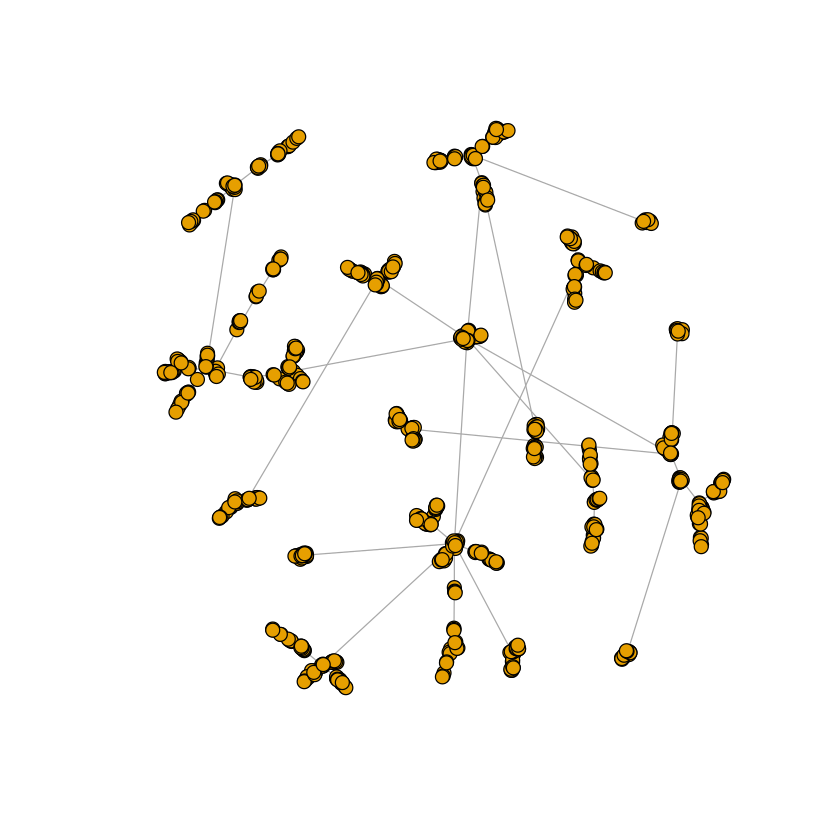

In [2]:
n <- 1000
m <- 1
pa_1000 = sample_pa(n,m,directed = FALSE)
is_connected(pa_1000)
plot(pa_1000,vertex.size=5, vertex.label=NA)

In [262]:
setEPS()
postscript("1_2_a.eps")
plot(pa_1000,vertex.size=5, vertex.label=NA)
dev.off()

png 
  2

1.2.b

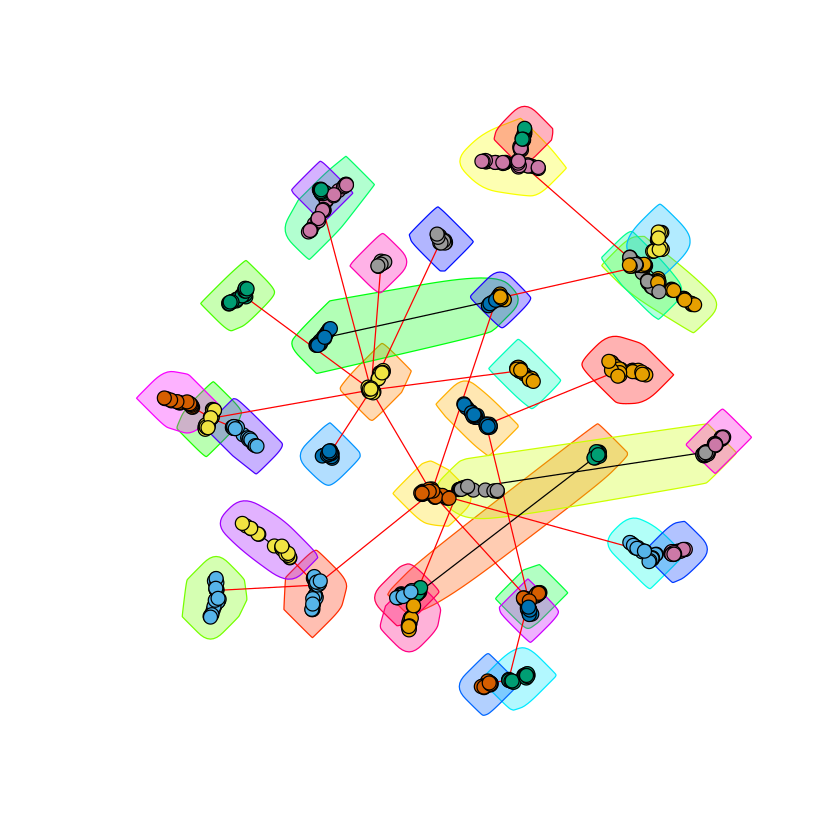

In [3]:
pa_com = cluster_fast_greedy(pa_1000)
pa_mod = modularity(pa_com)
plot(pa_com, pa_1000, vertex.size=5, vertex.label=NA)

In [263]:
setEPS()
postscript("1_2_b.eps")
plot(pa_com, pa_1000, vertex.size=5, vertex.label=NA)
dev.off()

Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“semi-transparency is not supported on this device: reported only once per page”


png 
  2

1.2.c


[1] TRUE

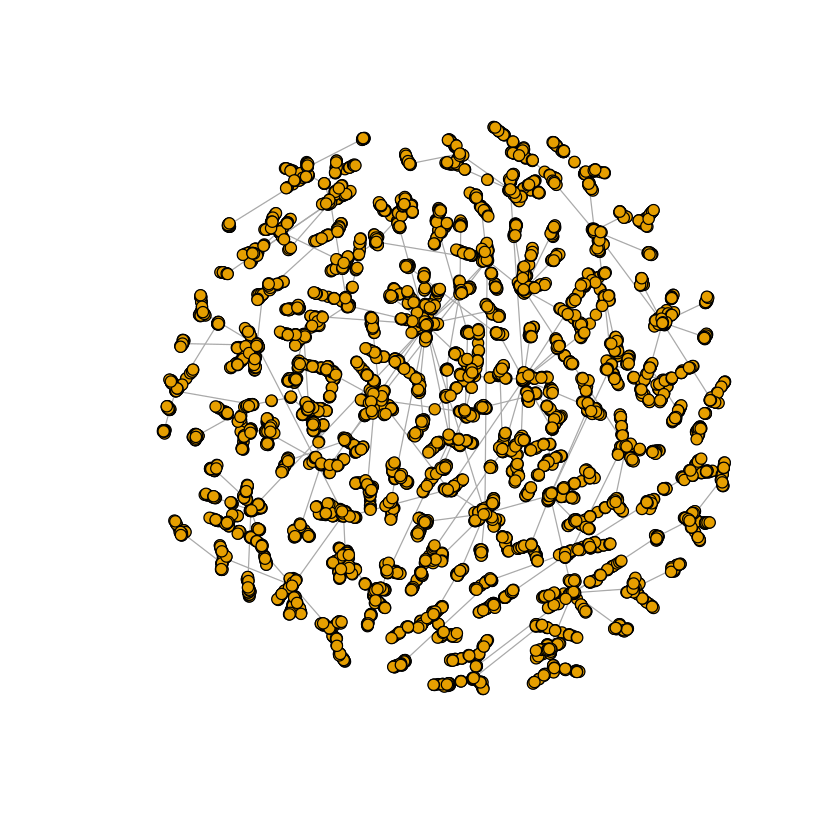

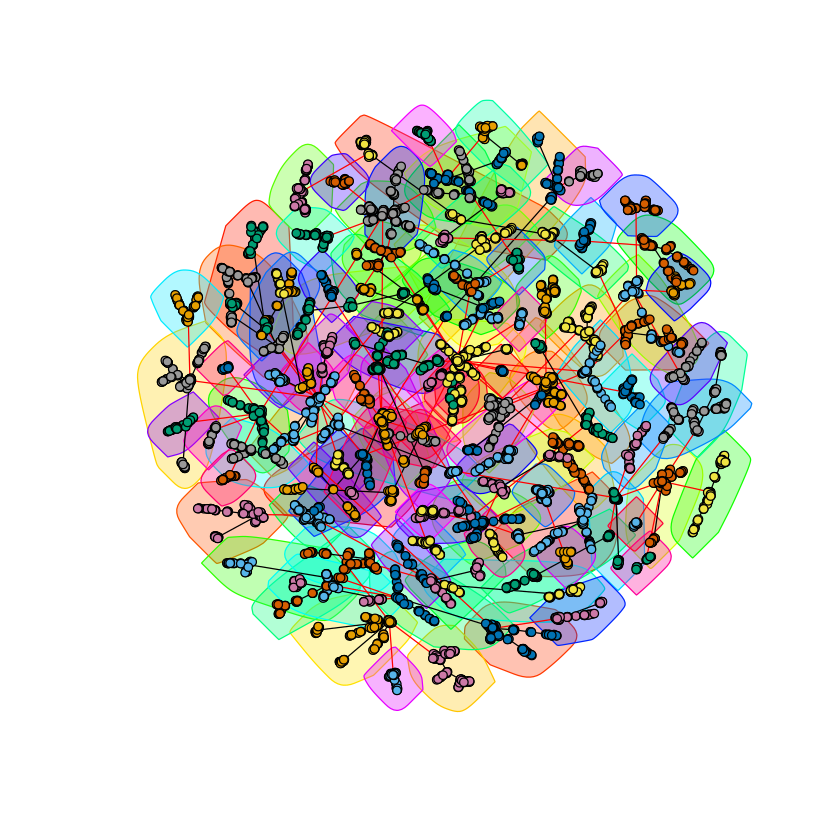

In [4]:
pa_10000 = sample_pa(10000,1,directed = FALSE)
is_connected(pa_10000)
plot(pa_10000,vertex.size=4, vertex.label=NA)
pa_com2 = cluster_fast_greedy(pa_10000)
pa_mod2 = modularity(pa_com2)
plot(pa_com2, pa_10000, vertex.size=3, vertex.label=NA)

In [267]:
setEPS()
postscript("1_2_c1.eps")
plot(pa_10000,vertex.size=4, vertex.label=NA)
dev.off()
setEPS()
postscript("1_2_c2.eps")
plot(pa_com2, pa_10000, vertex.size=3, vertex.label=NA)
dev.off()

png 
  2

Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“semi-transparency is not supported on this device: reported only once per page”


png 
  2

1.2.d

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“8 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution1 ~ log_deg1)

Coefficients:
(Intercept)     log_deg1  
    -0.1608      -2.3598  


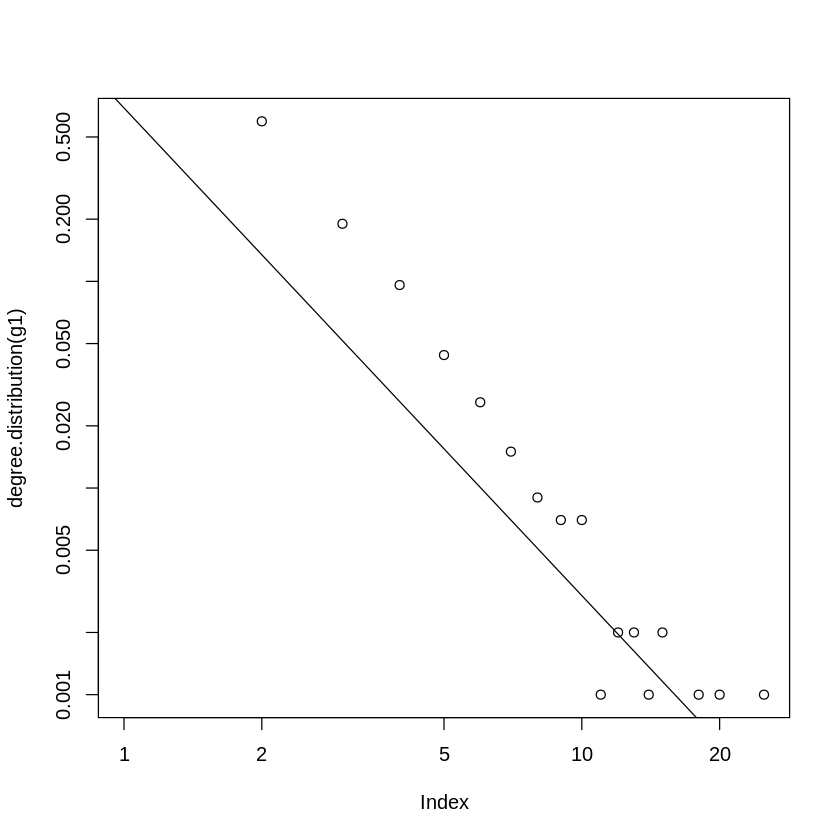

In [198]:
g1 = sample_pa(1000, m =1, directed=FALSE)
plot(degree.distribution(g1),log='xy')
deg_distribution1 = degree.distribution(g1)


log_deg1 = log(seq(1,length(deg_distribution1[-1]))) 
#log_deg1 = log(seq(1,max(degree(g1)))) #same
log_distribution1 = log(deg_distribution1[-1])

idx1 = which(log_distribution1 != -Inf, arr.ind=TRUE)
log_distribution1= log_distribution1[c(idx1)]
log_deg1 = log_deg1[c(idx1)]


lm(log_distribution1~log_deg1)
abline(lm(log_distribution1~log_deg1))


In [270]:
setEPS()
postscript("1_2_d1.eps")
plot(degree.distribution(g1),log='xy')
lm(log_distribution1~log_deg1)
abline(lm(log_distribution1~log_deg1))
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“8 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution1 ~ log_deg1)

Coefficients:
(Intercept)     log_deg1  
    -0.1608      -2.3598  


png 
  2

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“22 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution2 ~ log_deg2)

Coefficients:
(Intercept)     log_deg2  
     0.2308      -2.6927  


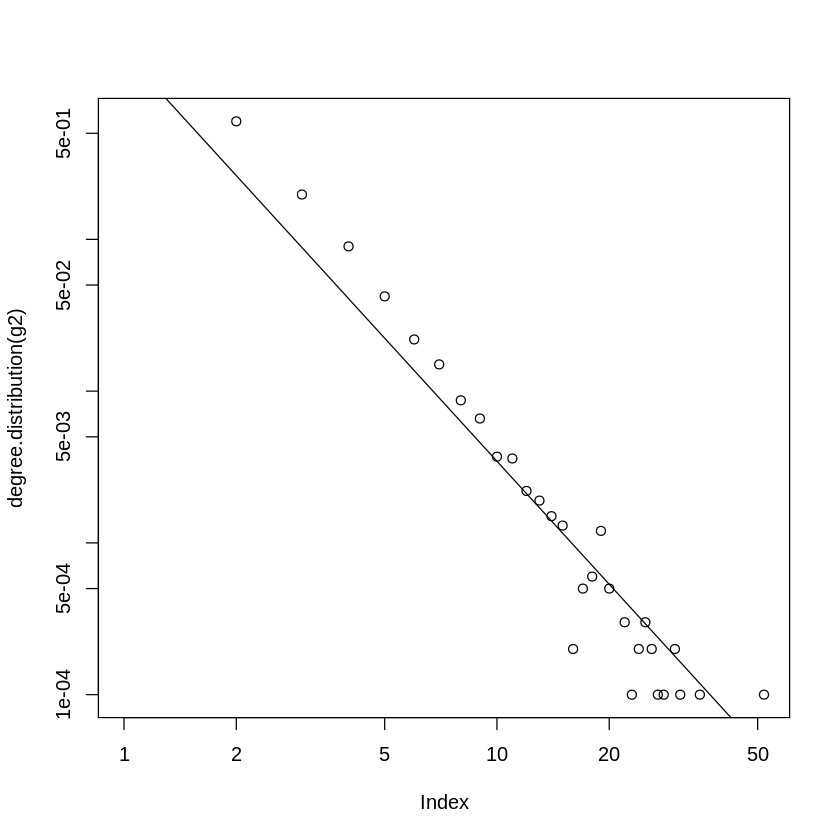

In [240]:
g2 = sample_pa(10000, m =1, directed=FALSE)
plot(degree.distribution(g2),log='xy')
deg_distribution2 = degree.distribution(g2)


log_deg2 = log(seq(1,length(deg_distribution2[-1])))
log_distribution2 = log(deg_distribution2[-1])
idx2 = which(log_distribution2 != -Inf,arr.ind=TRUE)
log_distribution2= log_distribution2[idx2]
log_deg2 = log_deg2[idx2]
lm(log_distribution2~log_deg2)
abline(lm(log_distribution2~log_deg2))


In [268]:
setEPS()
postscript("1_2_d2.eps")
plot(degree.distribution(g2),log='xy')
lm(log_distribution2~log_deg2)
abline(lm(log_distribution2~log_deg2))
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“22 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution2 ~ log_deg2)

Coefficients:
(Intercept)     log_deg2  
     0.2308      -2.6927  


png 
  2

1.2.e


Call:
lm(formula = log_distribution_neighbors ~ log_degree_neighbors)

Coefficients:
         (Intercept)  log_degree_neighbors  
               8.364                -1.321  


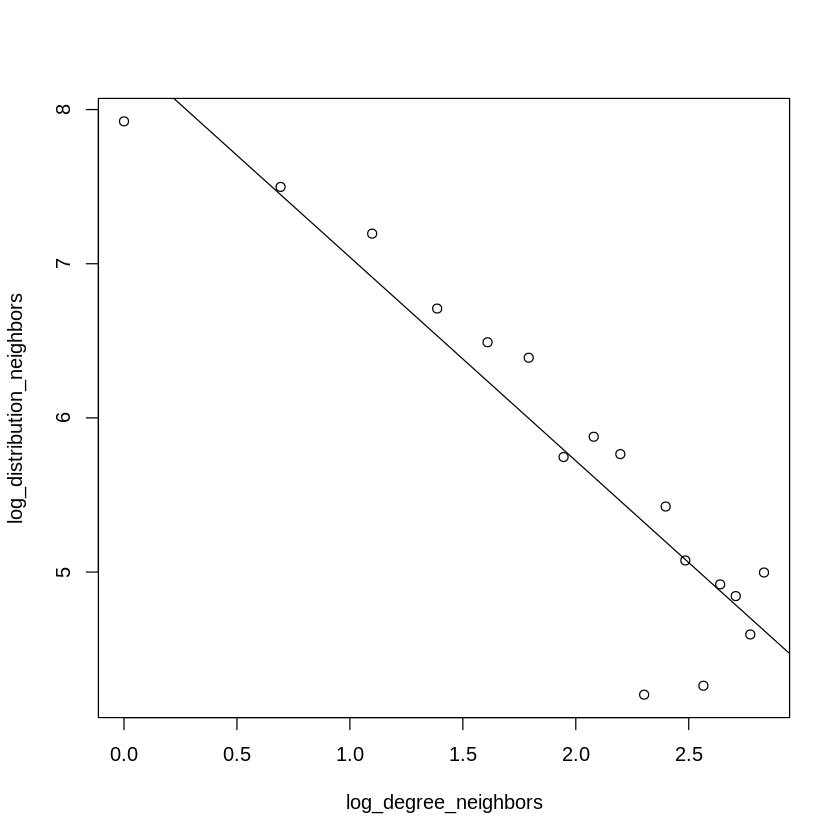

In [241]:
degree_j = c()
iter = 10000
for (i in seq(1:iter)) 
{
    node_i = sample(vcount(g1), 1) 
    neighbors_node_i = neighbors(g1, node_i)
    node_j = sample(neighbors_node_i, 1)   
    degree_j = c(degree_j, degree(g1, node_j))
}
   
data_j = as.data.frame(table(degree_j))
log_degree_neighbors = log(as.numeric(data_j$degree_j))
log_distribution_neighbors = log(as.numeric(data_j$Freq))

plot(log_degree_neighbors,log_distribution_neighbors)
abline(lm(log_distribution_neighbors ~ log_degree_neighbors))
lm(log_distribution_neighbors ~ log_degree_neighbors)

In [271]:
setEPS()
postscript("1_2_e1.eps")
plot(log_degree_neighbors,log_distribution_neighbors)
abline(lm(log_distribution_neighbors ~ log_degree_neighbors))
lm(log_distribution_neighbors ~ log_degree_neighbors)
dev.off()


Call:
lm(formula = log_distribution_neighbors ~ log_degree_neighbors)

Coefficients:
         (Intercept)  log_degree_neighbors  
               8.364                -1.321  


png 
  2


Call:
lm(formula = log_distribution_neighbors2 ~ log_degree_neighbors2)

Coefficients:
          (Intercept)  log_degree_neighbors2  
                8.807                 -1.685  


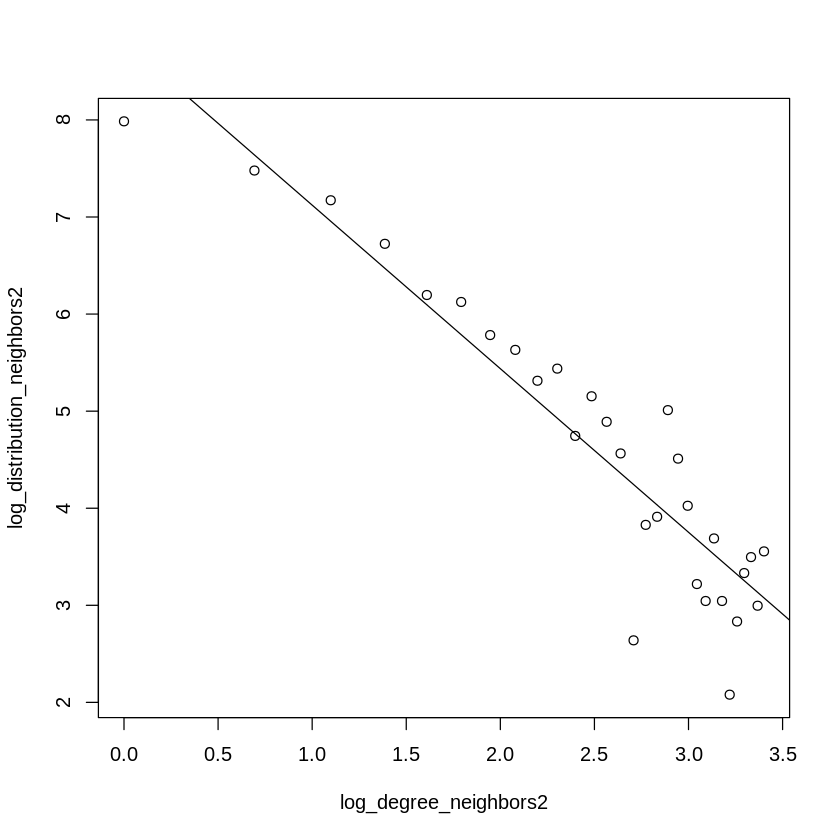

In [242]:
degree_j2 = c()
iter = 10000
for (i in seq(1:iter)) 
{
    node_i2 = sample(vcount(g2), 1) 
    neighbors_node_i2 = neighbors(g2, node_i2)
    node_j2 = sample(neighbors_node_i2, 1)   
    degree_j2 = c(degree_j2, degree(g2, node_j2))
}
   
data_j2 = as.data.frame(table(degree_j2))
log_degree_neighbors2 = log(as.numeric(data_j2$degree_j))
log_distribution_neighbors2 = log(as.numeric(data_j2$Freq))

plot(log_degree_neighbors2,log_distribution_neighbors2)
abline(lm(log_distribution_neighbors2 ~ log_degree_neighbors2))
lm(log_distribution_neighbors2 ~ log_degree_neighbors2)

In [272]:
setEPS()
postscript("1_2_e2.eps")
plot(log_degree_neighbors2,log_distribution_neighbors2)
abline(lm(log_distribution_neighbors2 ~ log_degree_neighbors2))
lm(log_distribution_neighbors2 ~ log_degree_neighbors2)
dev.off()


Call:
lm(formula = log_distribution_neighbors2 ~ log_degree_neighbors2)

Coefficients:
          (Intercept)  log_degree_neighbors2  
                8.807                 -1.685  


png 
  2

1.2.f

Warning message in degree_age + as.vector(degree(g_age)):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”


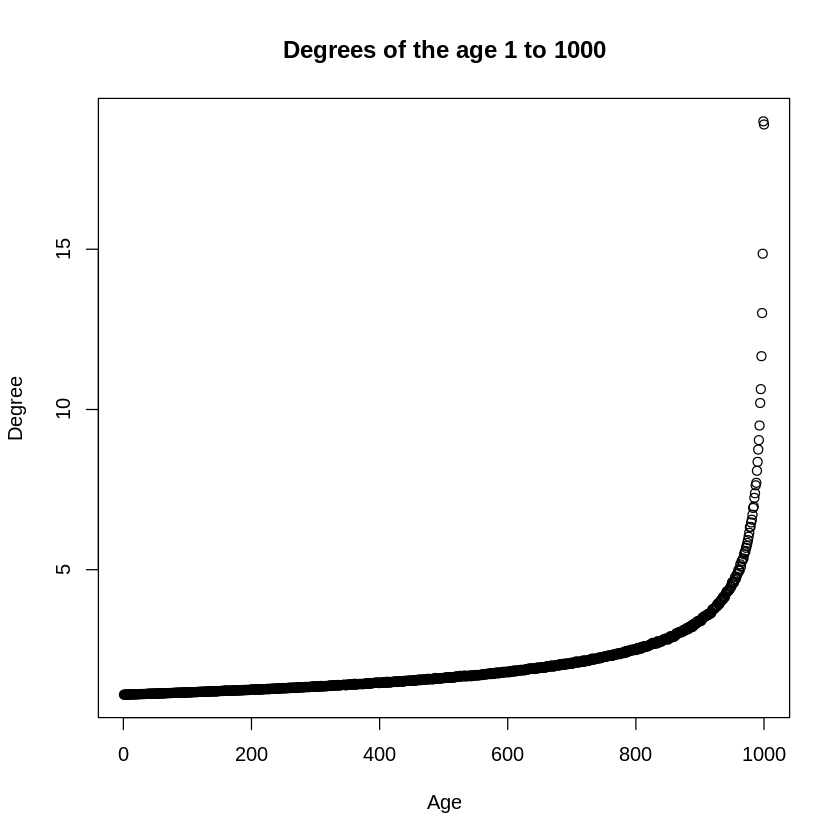

In [273]:
#iterate 10000 times for expected value
degree_age = array(1000)
iter = 10000
for (i in seq(1:iter)) 
{
    g_age = sample_pa(1000, m =1, directed=FALSE)
    degree_age = degree_age + as.vector(degree(g_age))
}

degree_age = degree_age / iter
age=rev(seq(1:1000))
plot(age,degree_age,main="Degrees of the age 1 to 1000",xlab="Age",ylab="Degree")

In [274]:
setEPS()
postscript("1_2_f1.eps")
plot(age,degree_age,main="Degrees of the age 1 to 1000",xlab="Age",ylab="Degree")
dev.off()

png 
  2

1.2.g

[1] TRUE

[1] 0.5219971

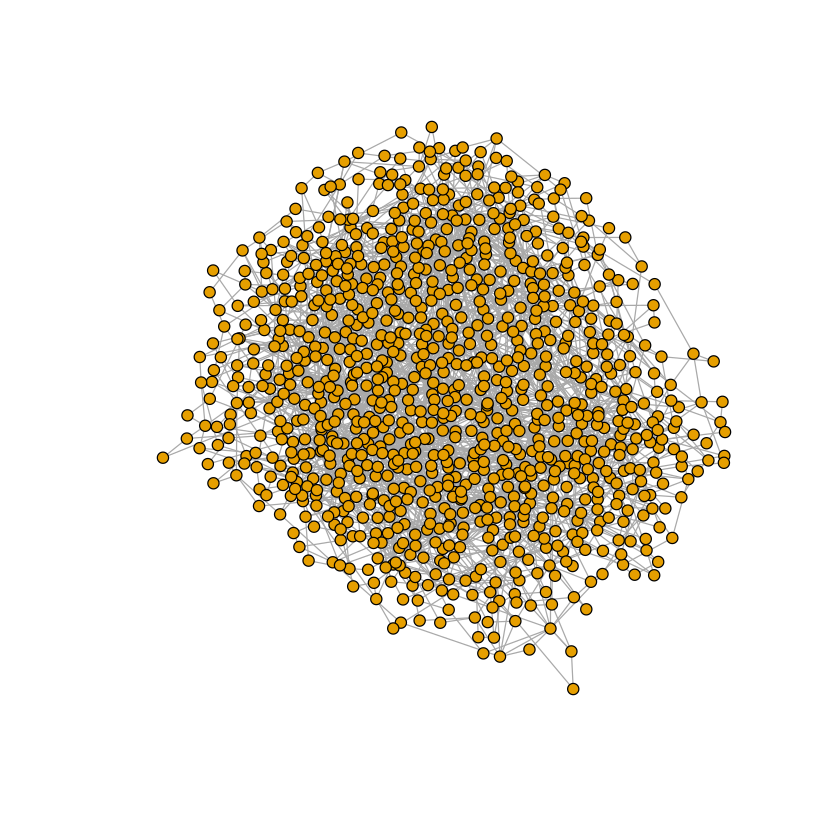

png 
  2

Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“semi-transparency is not supported on this device: reported only once per page”


png 
  2

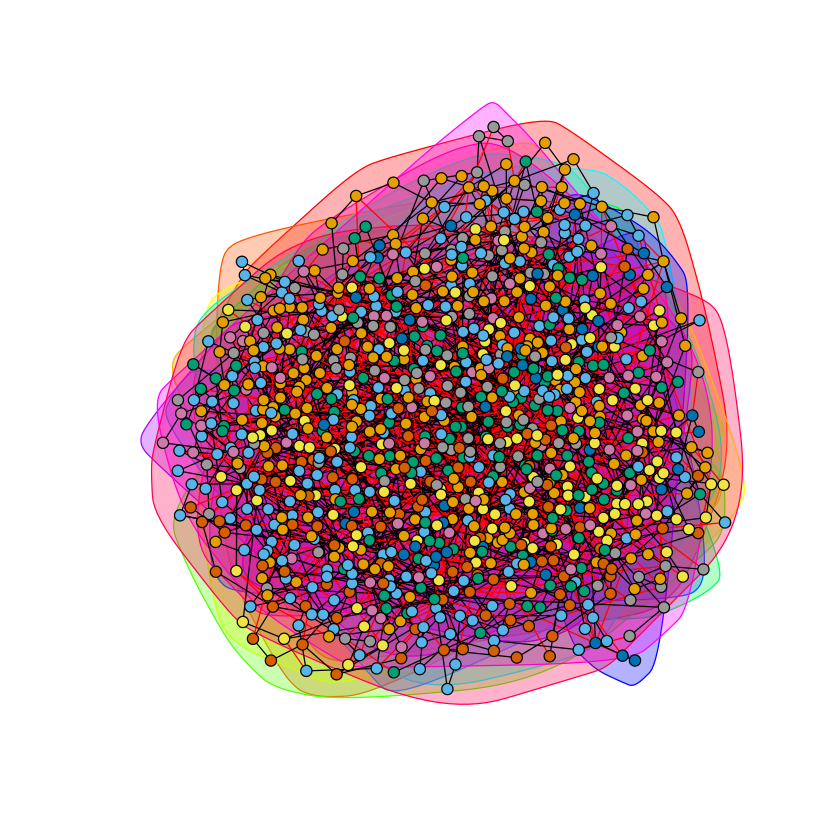

In [275]:
#m=2
pa_1000_2 = sample_pa(1000,m =2,directed = FALSE)
is_connected(pa_1000_2)
plot(pa_1000_2,vertex.size=4, vertex.label=NA)
pa_com_2 = cluster_fast_greedy(pa_1000_2)
pa_mod_2 = modularity(pa_com_2)
pa_mod_2
plot(pa_com_2, pa_1000_2, vertex.size=4, vertex.label=NA)

setEPS()
postscript("1_2_g_2_1.eps")
plot(pa_1000_2,vertex.size=4, vertex.label=NA)
dev.off()
setEPS()
postscript("1_2_g_2_2.eps")
plot(pa_com_2, pa_1000_2, vertex.size=4, vertex.label=NA)
dev.off()

[1] TRUE

[1] 0.5311826

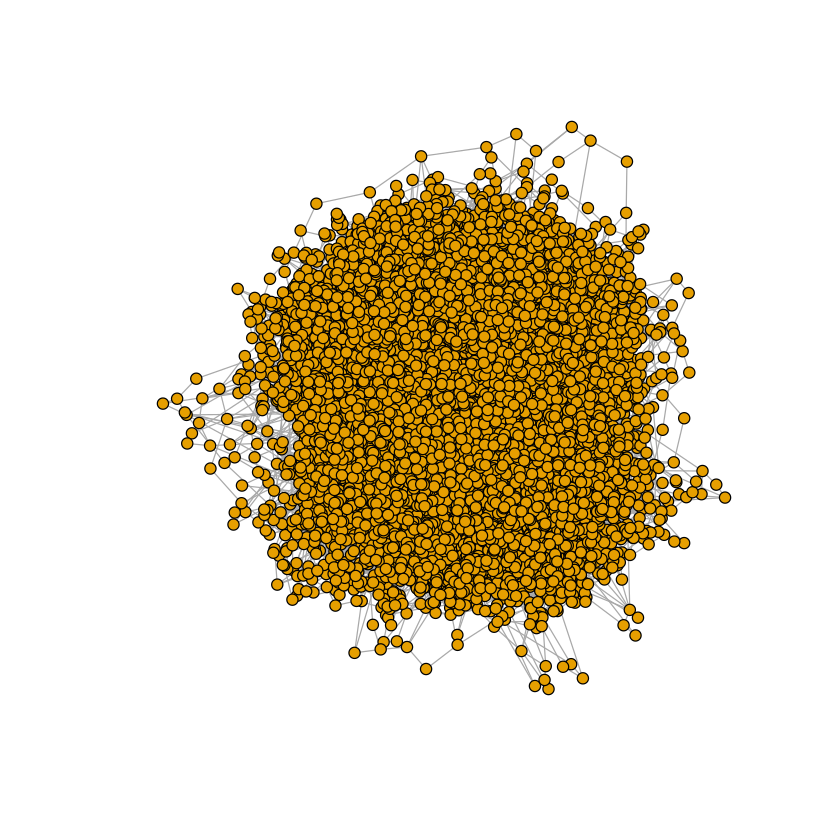

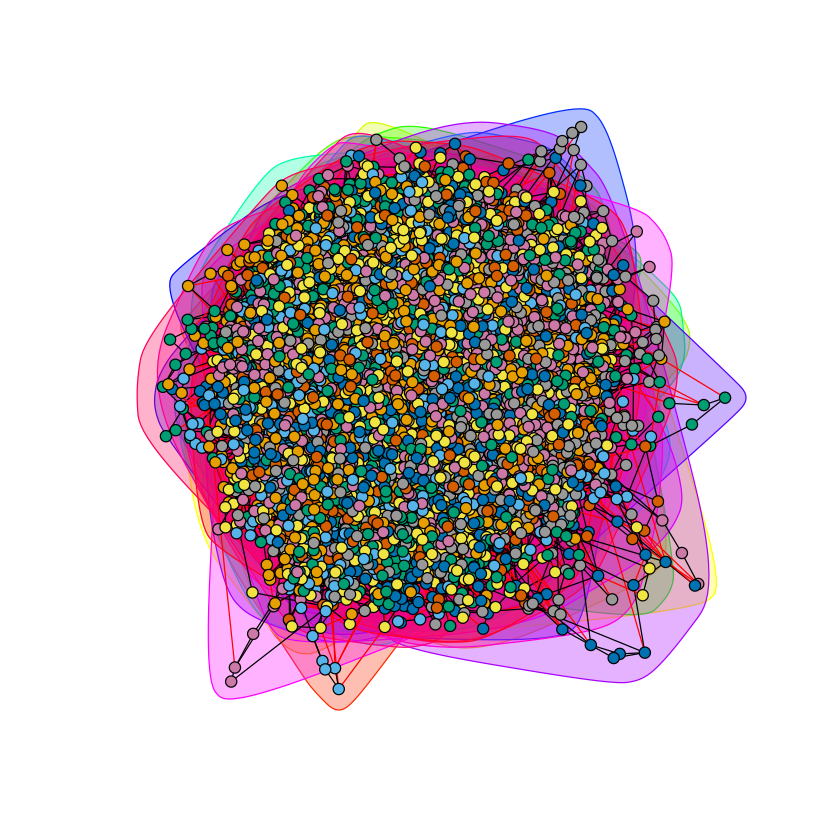

In [245]:
pa_10000_2 = sample_pa(10000,m =2,directed = FALSE)
is_connected(pa_10000_2)
plot(pa_10000_2,vertex.size=4, vertex.label=NA)
pa_com2_2 = cluster_fast_greedy(pa_10000_2)
pa_mod2_2 = modularity(pa_com2_2)
pa_mod2_2
plot(pa_com2_2, pa_10000_2, vertex.size=4, vertex.label=NA)

In [276]:
setEPS()
postscript("1_2_g_2_3.eps")
plot(pa_10000_2,vertex.size=4, vertex.label=NA)
dev.off()
setEPS()
postscript("1_2_g_2_4.eps")
plot(pa_com2_2, pa_10000_2, vertex.size=4, vertex.label=NA)
dev.off()

png 
  2

Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“semi-transparency is not supported on this device: reported only once per page”


png 
  2

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“30 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution1_2 ~ log_deg1_2)

Coefficients:
(Intercept)   log_deg1_2  
     0.4556      -2.1613  


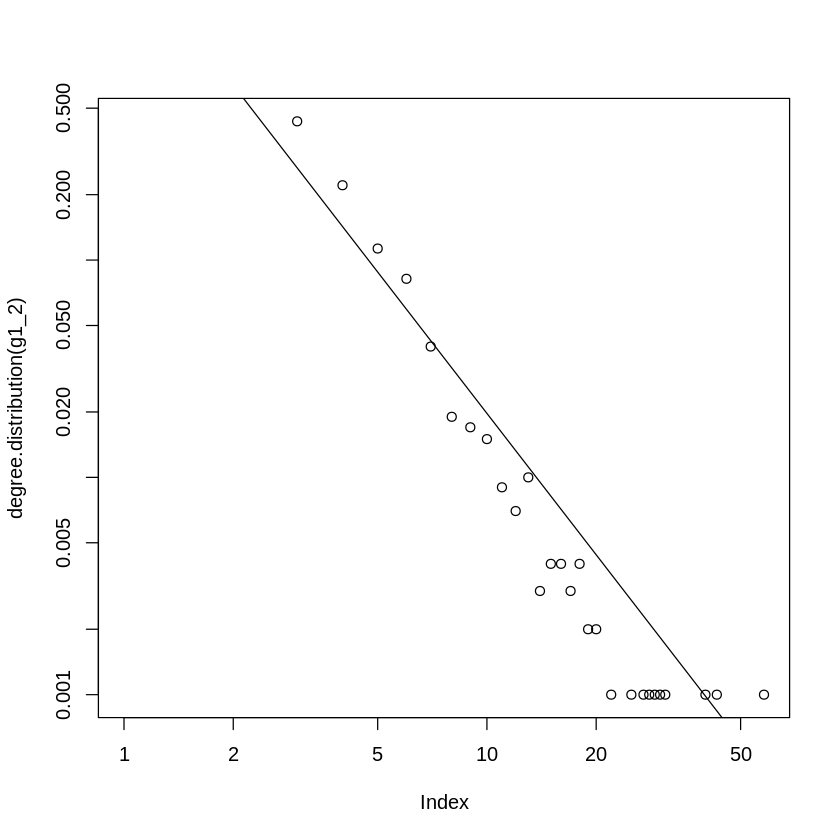

In [140]:
g1_2 = sample_pa(1000, m = 2, directed=FALSE)
plot(degree.distribution(g1_2),log='xy')

deg_distribution1_2 = degree.distribution(g1_2) 


#log_deg1 = log(seq(1,length(deg_distribution1[-1])))
log_deg1_2 = log(seq(1,max(degree(g1_2)))) #same
log_distribution1_2 = log(deg_distribution1_2[-1])

idx1_2 = which(log_distribution1_2 != -Inf,arr.ind=TRUE)
log_distribution1_2= log_distribution1_2[idx1_2]
log_deg1_2 = log_deg1_2[idx1_2]


lm(log_distribution1_2~log_deg1_2)
abline(lm(log_distribution1_2~log_deg1_2))


In [277]:
setEPS()
postscript("1_2_g_2_5.eps")
plot(degree.distribution(g1_2),log='xy')
lm(log_distribution1_2~log_deg1_2)
abline(lm(log_distribution1_2~log_deg1_2))
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“30 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution1_2 ~ log_deg1_2)

Coefficients:
(Intercept)   log_deg1_2  
     0.4556      -2.1613  


png 
  2

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“118 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution2_2 ~ log_deg2_2)

Coefficients:
(Intercept)   log_deg2_2  
     0.1942      -2.2430  


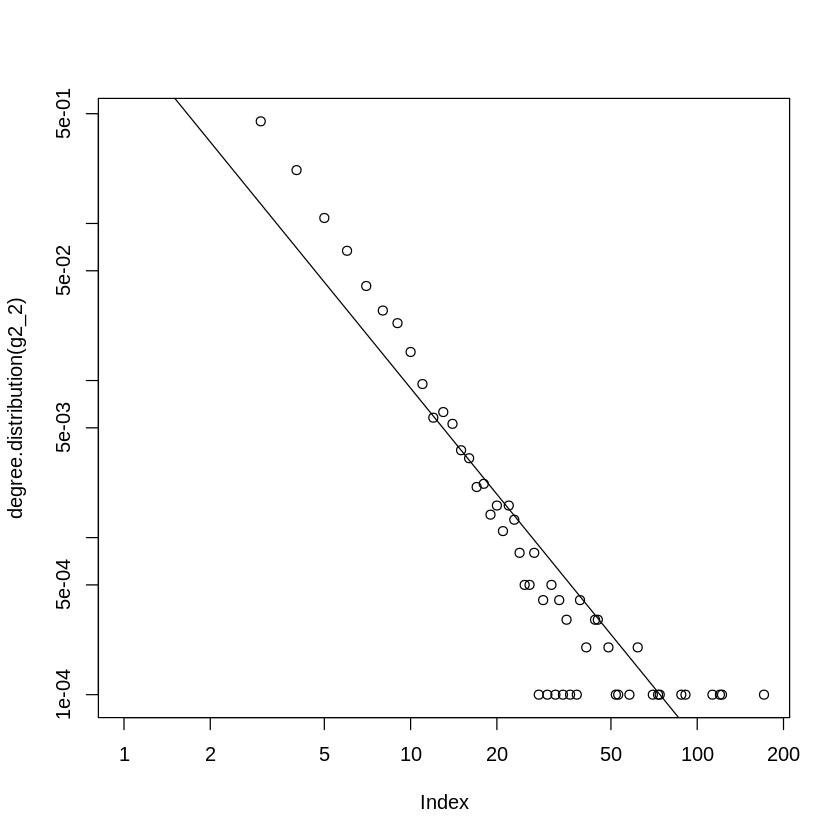

In [141]:
g2_2 = sample_pa(10000, m = 2, directed=FALSE)
plot(degree.distribution(g2_2),log='xy')
deg_distribution2_2 = degree.distribution(g2_2)


log_deg2_2 = log(seq(1,length(deg_distribution2_2[-1])))
log_distribution2_2 = log(deg_distribution2_2[-1])
idx2_2 = which(log_distribution2_2 != -Inf,arr.ind=TRUE)
log_distribution2_2= log_distribution2_2[idx2_2]
log_deg2_2 = log_deg2_2[idx2_2]
lm(log_distribution2_2~log_deg2_2)
abline(lm(log_distribution2_2~log_deg2_2))


In [278]:
setEPS()
postscript("1_2_g_2_6.eps")
plot(degree.distribution(g2_2),log='xy')
lm(log_distribution2_2~log_deg2_2)
abline(lm(log_distribution2_2~log_deg2_2))
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“118 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution2_2 ~ log_deg2_2)

Coefficients:
(Intercept)   log_deg2_2  
     0.1942      -2.2430  


png 
  2


Call:
lm(formula = log_distribution_neighbors_2 ~ log_degree_neighbors_2)

Coefficients:
           (Intercept)  log_degree_neighbors_2  
                 8.003                  -1.111  


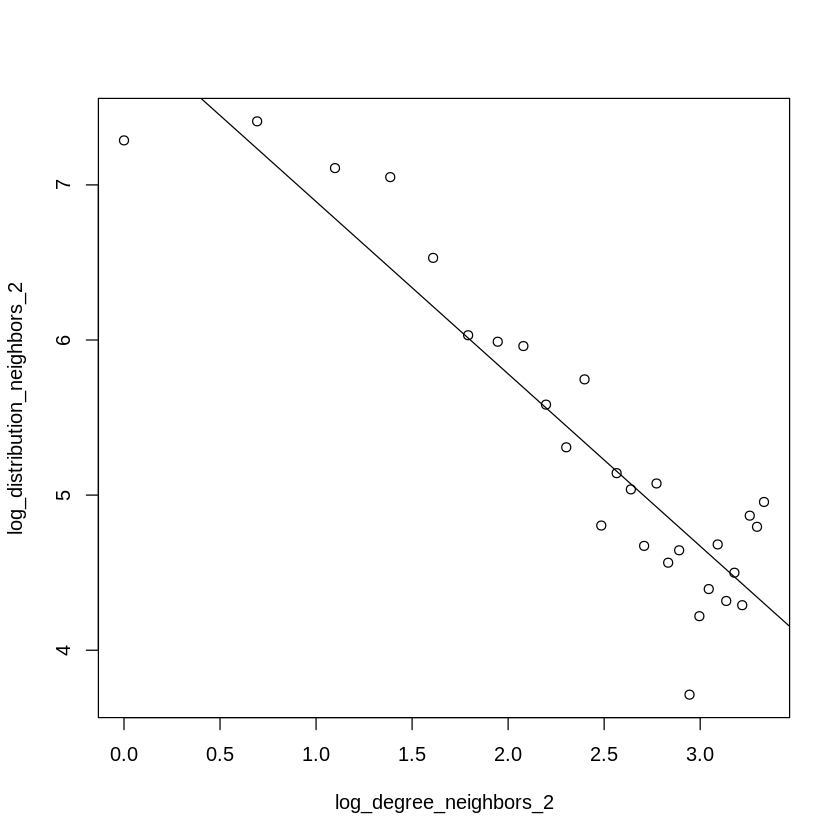

In [142]:
degree_j_2 = c()
iter = 10000
for (i in seq(1:iter)) 
{
    node_i_2 = sample(vcount(g1_2), 1) 
    neighbors_node_i_2 = neighbors(g1_2, node_i_2)
    node_j_2 = sample(neighbors_node_i_2, 1)   
    degree_j_2 = c(degree_j_2, degree(g1_2, node_j_2))
}
   
data_j_2 = as.data.frame(table(degree_j_2))
log_degree_neighbors_2 = log(as.numeric(data_j_2$degree_j_2))
log_distribution_neighbors_2 = log(as.numeric(data_j_2$Freq))

plot(log_degree_neighbors_2,log_distribution_neighbors_2)
abline(lm(log_distribution_neighbors_2 ~ log_degree_neighbors_2))
lm(log_distribution_neighbors_2 ~ log_degree_neighbors_2)

In [279]:
setEPS()
postscript("1_2_g_2_7.eps")
plot(log_degree_neighbors_2,log_distribution_neighbors_2)
abline(lm(log_distribution_neighbors_2 ~ log_degree_neighbors_2))
lm(log_distribution_neighbors_2 ~ log_degree_neighbors_2)
dev.off()


Call:
lm(formula = log_distribution_neighbors_2 ~ log_degree_neighbors_2)

Coefficients:
           (Intercept)  log_degree_neighbors_2  
                 8.003                  -1.111  


png 
  2


Call:
lm(formula = log_distribution_neighbors2_2 ~ log_degree_neighbors2_2)

Coefficients:
            (Intercept)  log_degree_neighbors2_2  
                  8.491                   -1.473  


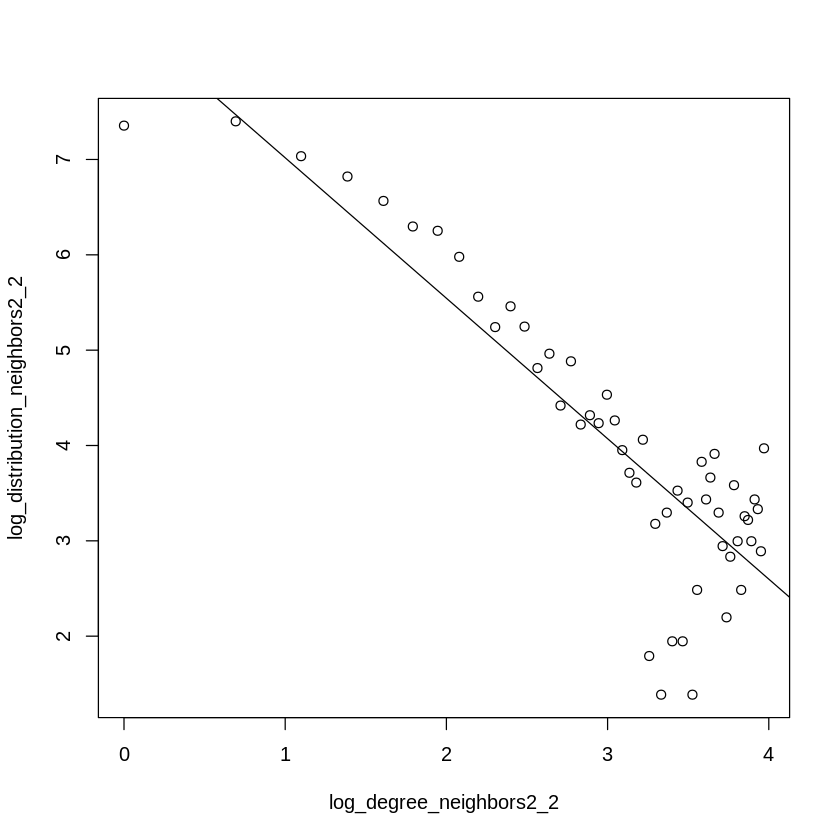

In [143]:
degree_j2_2 = c()
iter = 10000
for (i in seq(1:iter)) 
{
    node_i2_2 = sample(vcount(g2_2), 1) 
    neighbors_node_i2_2 = neighbors(g2_2, node_i2_2)
    node_j2_2 = sample(neighbors_node_i2_2, 1)   
    degree_j2_2 = c(degree_j2_2, degree(g2_2, node_j2_2))
}
   
data_j2_2 = as.data.frame(table(degree_j2_2))
log_degree_neighbors2_2 = log(as.numeric(data_j2_2$degree_j2_2))
log_distribution_neighbors2_2 = log(as.numeric(data_j2_2$Freq))

plot(log_degree_neighbors2_2,log_distribution_neighbors2_2)
abline(lm(log_distribution_neighbors2_2 ~ log_degree_neighbors2_2))
lm(log_distribution_neighbors2_2 ~ log_degree_neighbors2_2)

In [280]:
setEPS()
postscript("1_2_g_2_8.eps")
plot(log_degree_neighbors2_2,log_distribution_neighbors2_2)
abline(lm(log_distribution_neighbors2_2 ~ log_degree_neighbors2_2))
lm(log_distribution_neighbors2_2 ~ log_degree_neighbors2_2)
dev.off()


Call:
lm(formula = log_distribution_neighbors2_2 ~ log_degree_neighbors2_2)

Coefficients:
            (Intercept)  log_degree_neighbors2_2  
                  8.491                   -1.473  


png 
  2

Warning message in degree_age_2 + as.vector(degree(g_age_2)):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”


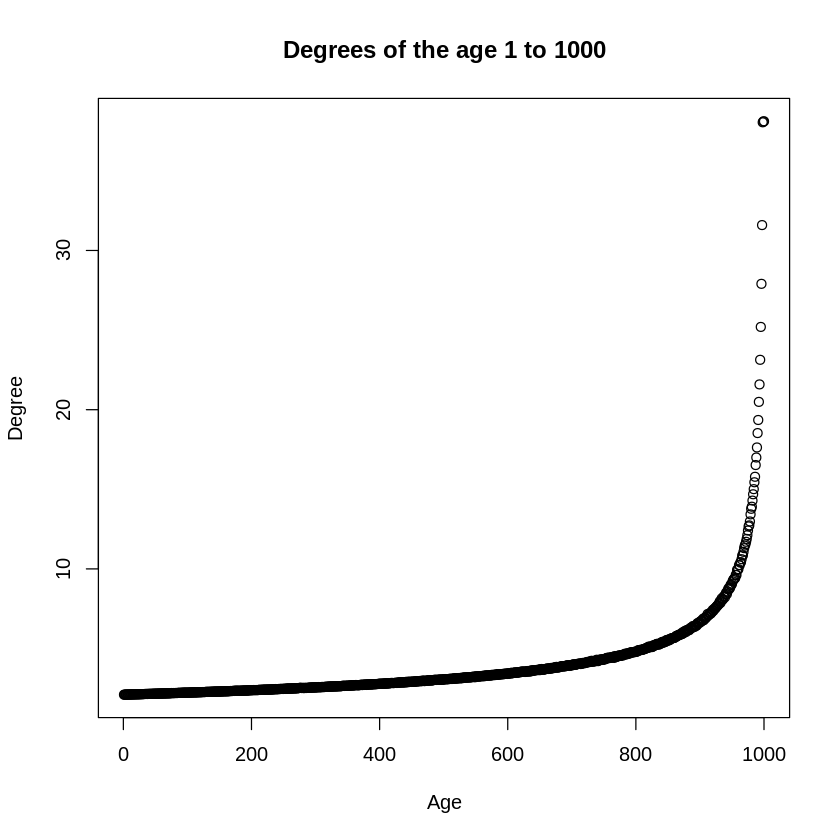

In [246]:
#iterate 10000 times for expected value
degree_age_2 = array(1000)
iter = 10000
for (i in seq(1:iter)) 
{
    g_age_2 = sample_pa(1000, m =2, directed=FALSE)
    degree_age_2 = degree_age_2 + as.vector(degree(g_age_2))
}

degree_age_2 = degree_age_2 / iter
age_2=rev(seq(1:1000))
plot(age_2,degree_age_2,main="Degrees of the age 1 to 1000",xlab="Age",ylab="Degree")

In [281]:
setEPS()
postscript("1_2_g_2_9.eps")
plot(age_2,degree_age_2,main="Degrees of the age 1 to 1000",xlab="Age",ylab="Degree")
dev.off()

png 
  2

[1] TRUE

[1] 0.2802583

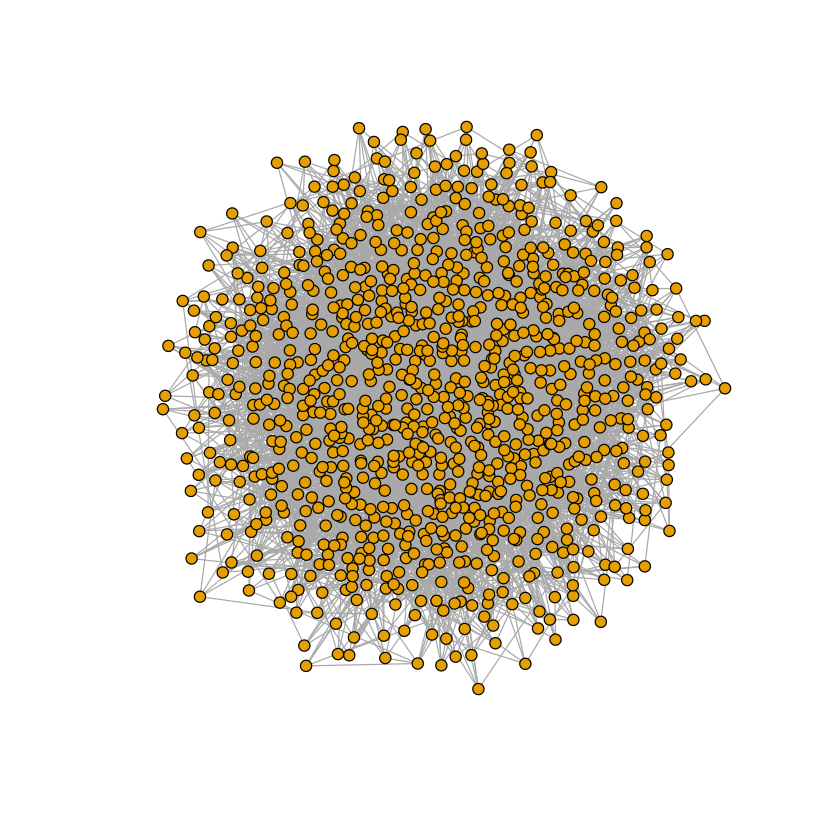

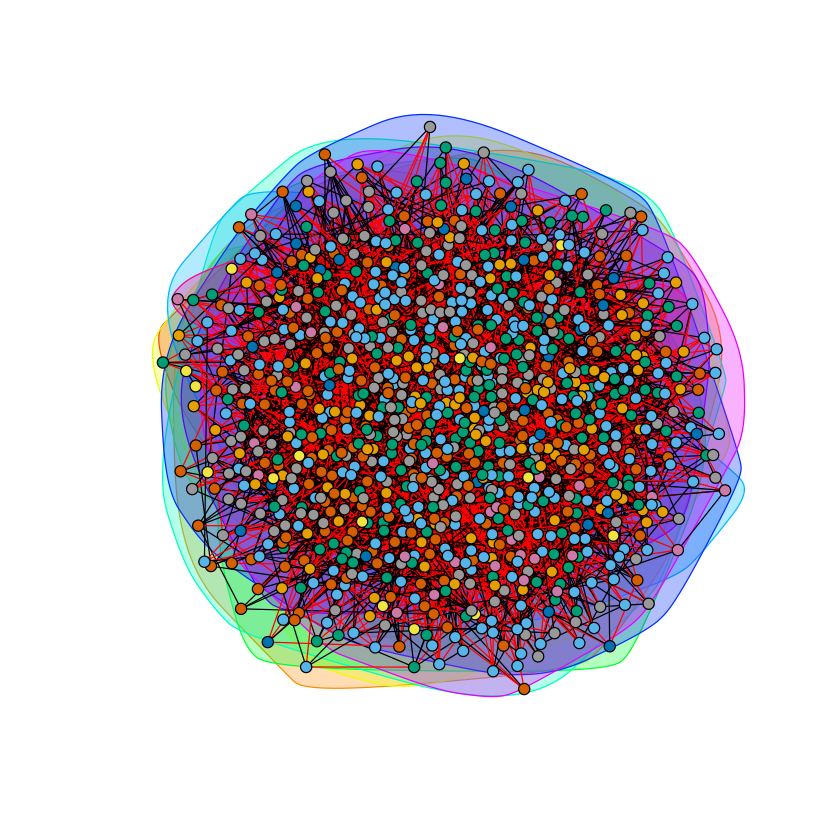

In [247]:
#m=5
pa_1000_5 = sample_pa(1000,m =5,directed = FALSE)
is_connected(pa_1000_5)
plot(pa_1000_5,vertex.size=4, vertex.label=NA)
pa_com_5 = cluster_fast_greedy(pa_1000_5)
pa_mod_5 = modularity(pa_com_5)
pa_mod_5
plot(pa_com_5, pa_1000_5, vertex.size=4, vertex.label=NA)



In [282]:
setEPS()
postscript("1_2_g_5_1.eps")
plot(pa_1000_5,vertex.size=4, vertex.label=NA)
dev.off()
setEPS()
postscript("1_2_g_5_2.eps")
plot(pa_com_5, pa_1000_5, vertex.size=4, vertex.label=NA)
dev.off()

png 
  2

Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“semi-transparency is not supported on this device: reported only once per page”


png 
  2

[1] TRUE

[1] 0.2743609

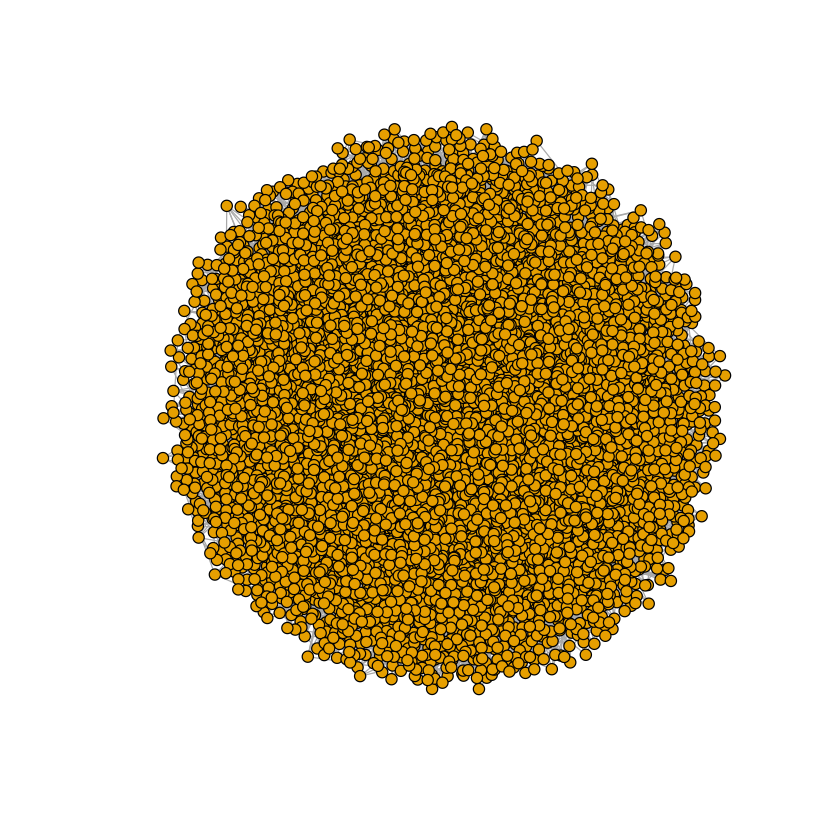

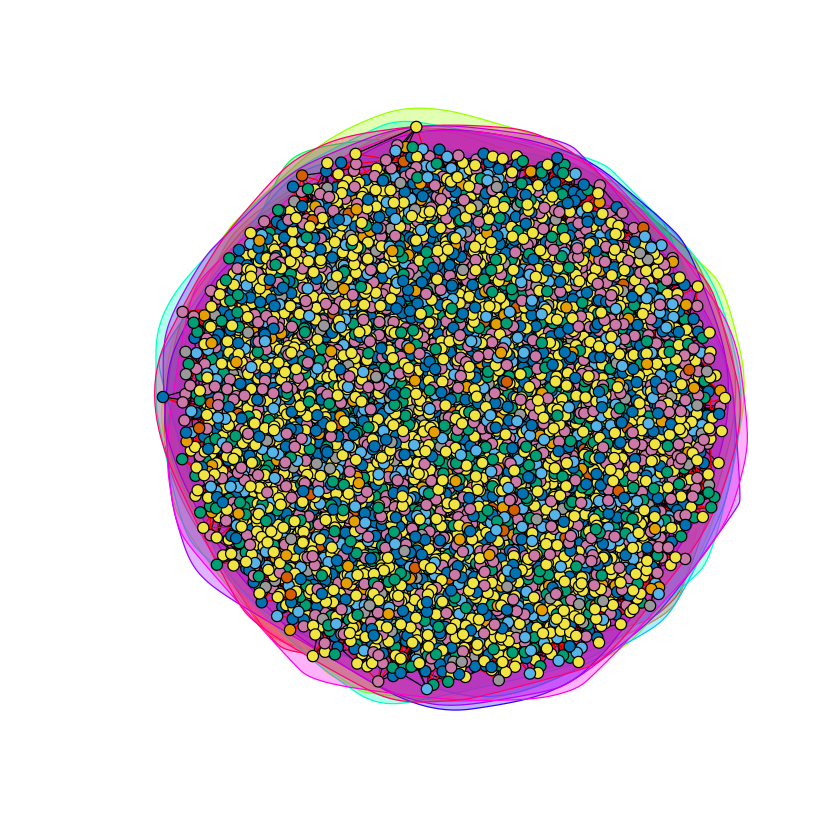

In [248]:
pa_10000_5 = sample_pa(10000,m =5,directed = FALSE)
is_connected(pa_10000_5)
plot(pa_10000_5,vertex.size=4, vertex.label=NA)
pa_com2_5 = cluster_fast_greedy(pa_10000_5)
pa_mod2_5 = modularity(pa_com2_5)
pa_mod2_5
plot(pa_com2_5, pa_10000_5, vertex.size=4, vertex.label=NA)

In [283]:
setEPS()
postscript("1_2_g_5_3.eps")
plot(pa_10000_5,vertex.size=4, vertex.label=NA)
dev.off()
setEPS()
postscript("1_2_g_5_4.eps")
plot(pa_com2_5, pa_10000_5, vertex.size=4, vertex.label=NA)
dev.off()

png 
  2

Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“semi-transparency is not supported on this device: reported only once per page”


png 
  2

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“45 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution1_5 ~ log_deg1_5)

Coefficients:
(Intercept)   log_deg1_5  
     0.9985      -1.9247  


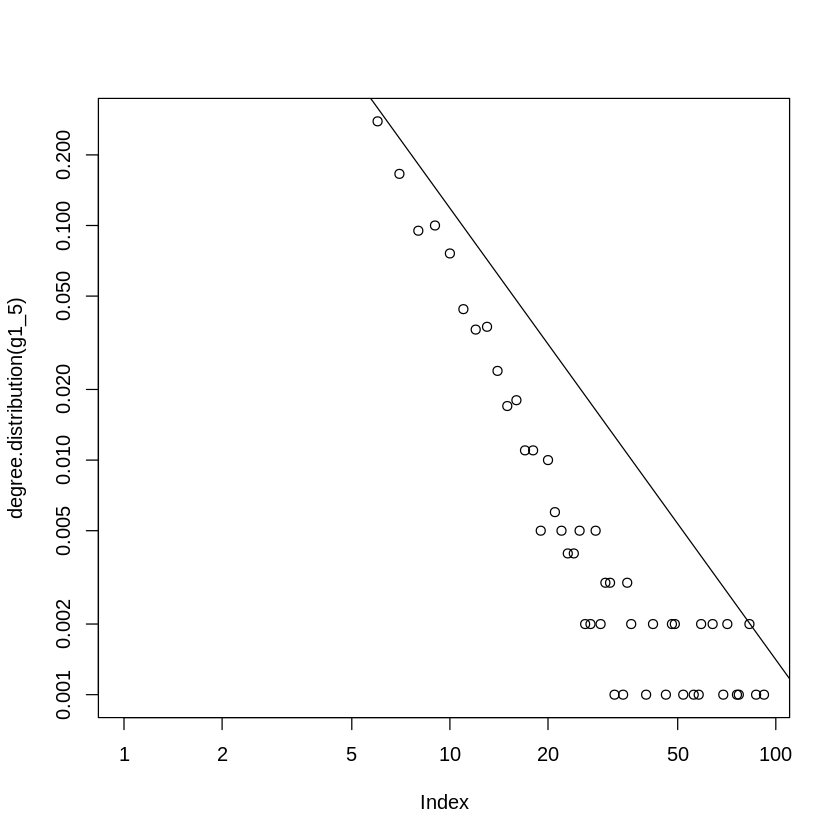

In [249]:
g1_5 = sample_pa(1000, m =5, directed=FALSE)
#setEPS()
#postscript("g1_5.eps")
plot(degree.distribution(g1_5),log='xy')
deg_distribution1_5 = degree.distribution(g1_5)


#log_deg1 = log(seq(1,length(deg_distribution1[-1])))
log_deg1_5 = log(seq(1,max(degree(g1_5)))) #same
log_distribution1_5 = log(deg_distribution1_5[-1])

idx1_5 = which(log_distribution1_5 != -Inf,arr.ind=TRUE)
log_distribution1_5= log_distribution1_5[idx1_5]
log_deg1_5 = log_deg1_5[idx1_5]


lm(log_distribution1_5~log_deg1_5)
abline(lm(log_distribution1_5~log_deg1_5))
#dev.off()


In [284]:
setEPS()
postscript("1_2_g_5_5.eps")
plot(degree.distribution(g1_5),log='xy')
lm(log_distribution1_5~log_deg1_5)
abline(lm(log_distribution1_5~log_deg1_5))
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“45 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution1_5 ~ log_deg1_5)

Coefficients:
(Intercept)   log_deg1_5  
     0.9985      -1.9247  


png 
  2

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“291 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution2_5 ~ log_deg2_5)

Coefficients:
(Intercept)   log_deg2_5  
     0.9652      -2.1061  


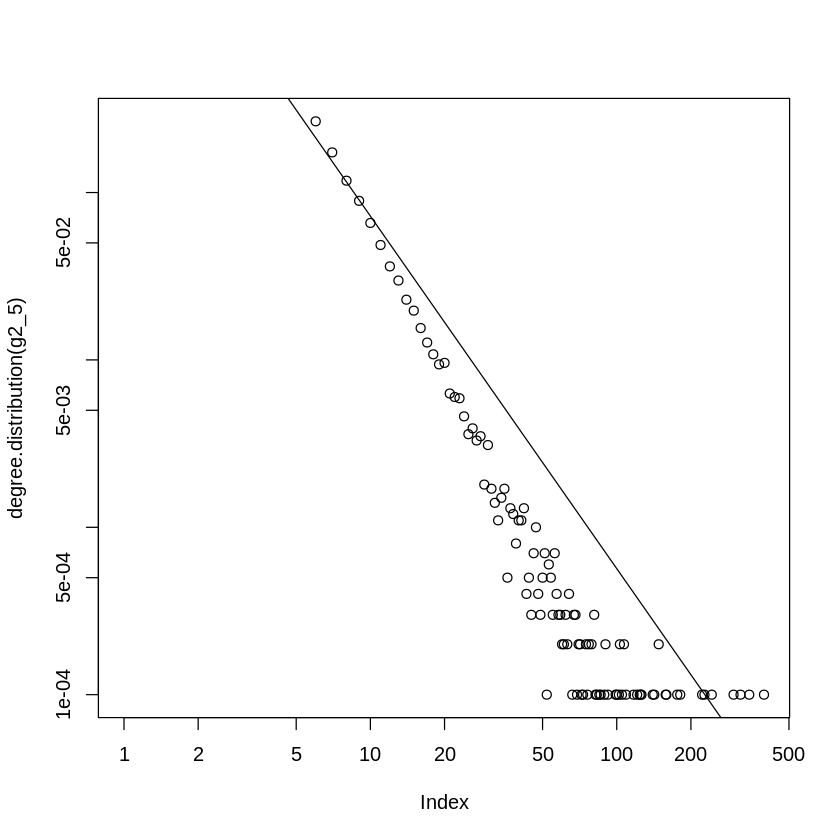

In [250]:
g2_5 = sample_pa(10000, m =5, directed=FALSE)
#setEPS()
#postscript("g2_5.eps")
plot(degree.distribution(g2_5),log='xy')
deg_distribution2_5 = degree.distribution(g2_5)


log_deg2_5 = log(seq(1,length(deg_distribution2_5[-1])))
log_distribution2_5 = log(deg_distribution2_5[-1])
idx2_5 = which(log_distribution2_5 != -Inf, arr.ind=TRUE)
log_distribution2_5= log_distribution2_5[idx2_5]
log_deg2_5 = log_deg2_5[idx2_5]
lm(log_distribution2_5~log_deg2_5)
abline(lm(log_distribution2_5~log_deg2_5))
#dev.off()


In [285]:
setEPS()
postscript("1_2_g_5_6.eps")
plot(degree.distribution(g2_5),log='xy')
lm(log_distribution2_5~log_deg2_5)
abline(lm(log_distribution2_5~log_deg2_5))
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“291 y values <= 0 omitted from logarithmic plot”



Call:
lm(formula = log_distribution2_5 ~ log_deg2_5)

Coefficients:
(Intercept)   log_deg2_5  
     0.9652      -2.1061  


png 
  2


Call:
lm(formula = log_distribution_neighbors_5 ~ log_degree_neighbors_5)

Coefficients:
           (Intercept)  log_degree_neighbors_5  
                7.4537                 -0.8822  


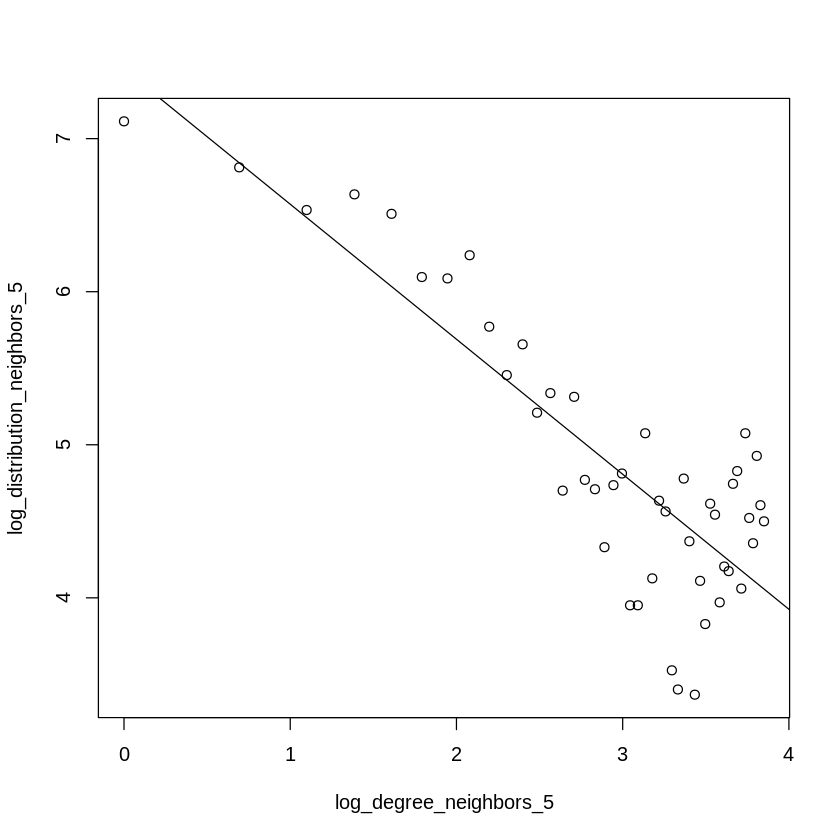

In [251]:
degree_j_5 = c()
iter = 10000
for (i in seq(1:iter)) 
{
    node_i_5 = sample(vcount(g1_5), 1) 
    neighbors_node_i_5 = neighbors(g1_5, node_i_5)
    node_j_5 = sample(neighbors_node_i_5, 1)   
    degree_j_5= c(degree_j_5, degree(g1_5, node_j_5))
}
   
data_j_5 = as.data.frame(table(degree_j_5))
log_degree_neighbors_5 = log(as.numeric(data_j_5$degree_j_5))
log_distribution_neighbors_5 = log(as.numeric(data_j_5$Freq))

plot(log_degree_neighbors_5,log_distribution_neighbors_5)
abline(lm(log_distribution_neighbors_5 ~ log_degree_neighbors_5))
lm(log_distribution_neighbors_5 ~ log_degree_neighbors_5)

In [286]:
setEPS()
postscript("1_2_g_5_7.eps")
plot(log_degree_neighbors_5,log_distribution_neighbors_5)
abline(lm(log_distribution_neighbors_5 ~ log_degree_neighbors_5))
lm(log_distribution_neighbors_5 ~ log_degree_neighbors_5)
dev.off()


Call:
lm(formula = log_distribution_neighbors_5 ~ log_degree_neighbors_5)

Coefficients:
           (Intercept)  log_degree_neighbors_5  
                7.4537                 -0.8822  


png 
  2


Call:
lm(formula = log_distribution_neighbors2_5 ~ log_degree_neighbors2_5)

Coefficients:
            (Intercept)  log_degree_neighbors2_5  
                  8.037                   -1.223  


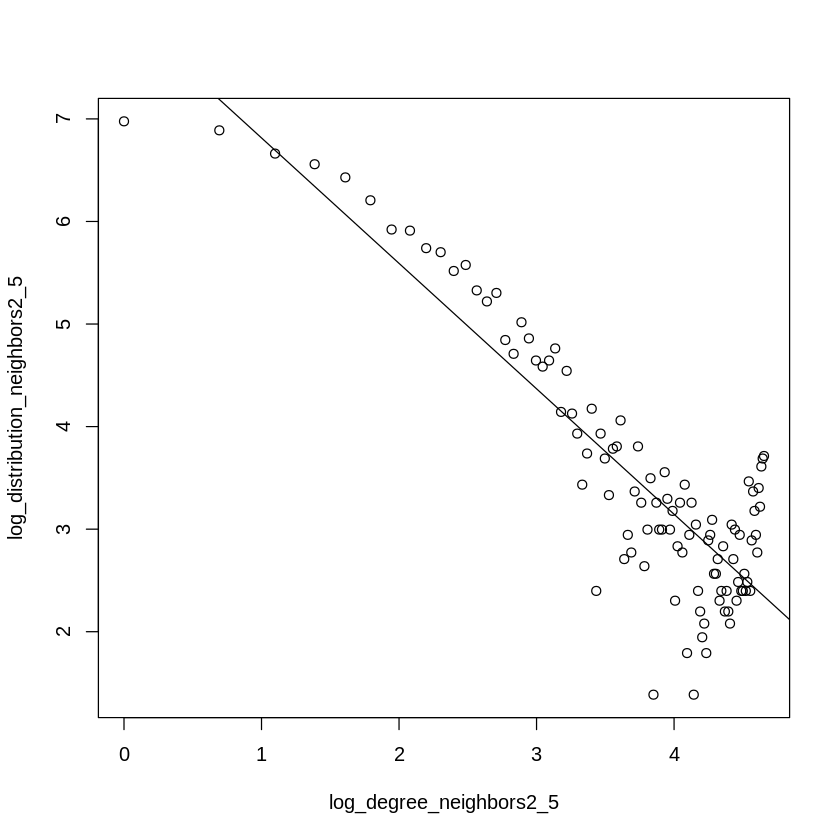

In [252]:
degree_j2_5 = c()
iter = 10000
for (i in seq(1:iter)) 
{
    node_i2_5= sample(vcount(g2_5), 1) 
    neighbors_node_i2_5 = neighbors(g2_5, node_i2_5)
    node_j2_5 = sample(neighbors_node_i2_5, 1)   
    degree_j2_5 = c(degree_j2_5, degree(g2_5, node_j2_5))
}
   
data_j2_5 = as.data.frame(table(degree_j2_5))
log_degree_neighbors2_5 = log(as.numeric(data_j2_5$degree_j2_5))
log_distribution_neighbors2_5 = log(as.numeric(data_j2_5$Freq))

plot(log_degree_neighbors2_5,log_distribution_neighbors2_5)
abline(lm(log_distribution_neighbors2_5 ~ log_degree_neighbors2_5))
lm(log_distribution_neighbors2_5 ~ log_degree_neighbors2_5)

In [287]:
setEPS()
postscript("1_2_g_5_8.eps")
plot(log_degree_neighbors2_5,log_distribution_neighbors2_5)
abline(lm(log_distribution_neighbors2_5 ~ log_degree_neighbors2_5))
lm(log_distribution_neighbors2_5 ~ log_degree_neighbors2_5)
dev.off()


Call:
lm(formula = log_distribution_neighbors2_5 ~ log_degree_neighbors2_5)

Coefficients:
            (Intercept)  log_degree_neighbors2_5  
                  8.037                   -1.223  


png 
  2

Warning message in degree_age_5 + as.vector(degree(g_age_5)):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”


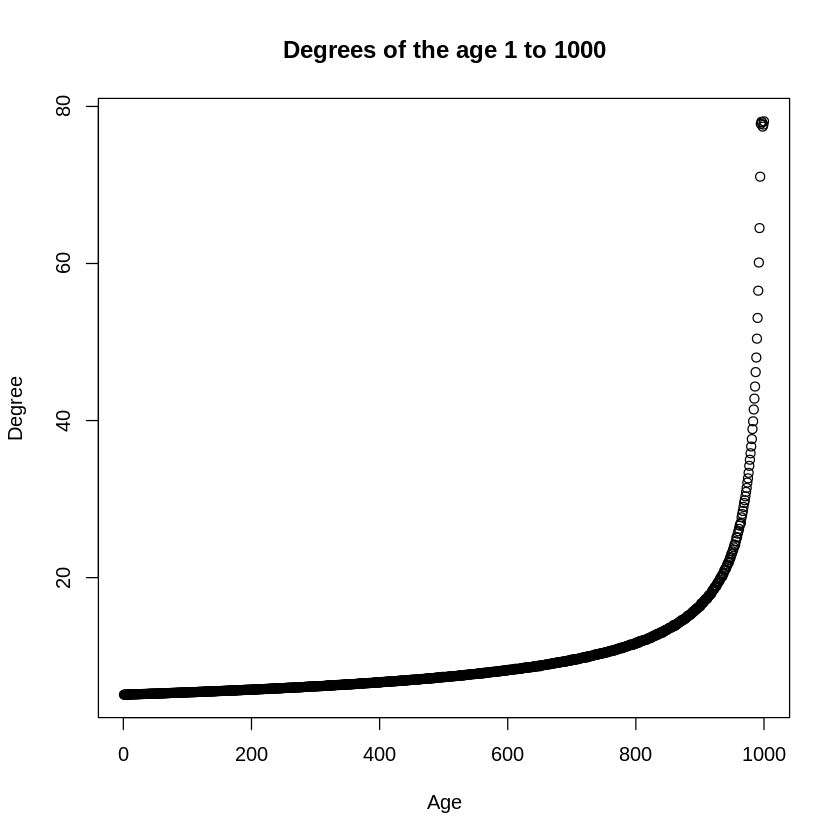

In [253]:
#iterate 10000 times for expected value
degree_age_5 = array(1000)
iter = 10000
for (i in seq(1:iter)) 
{
    g_age_5 = sample_pa(1000, m = 5 , directed=FALSE)
    degree_age_5 = degree_age_5 + as.vector(degree(g_age_5))
}

degree_age_5 = degree_age_5 / iter
age_5=rev(seq(1:1000))
plot(age_5,degree_age_5,main="Degrees of the age 1 to 1000",xlab="Age",ylab="Degree")

In [288]:
setEPS()
postscript("1_2_g_5_9.eps")
plot(age_5,degree_age_5,main="Degrees of the age 1 to 1000",xlab="Age",ylab="Degree")
dev.off()

png 
  2

1.2.h

[1] 0.930484

[1] TRUE

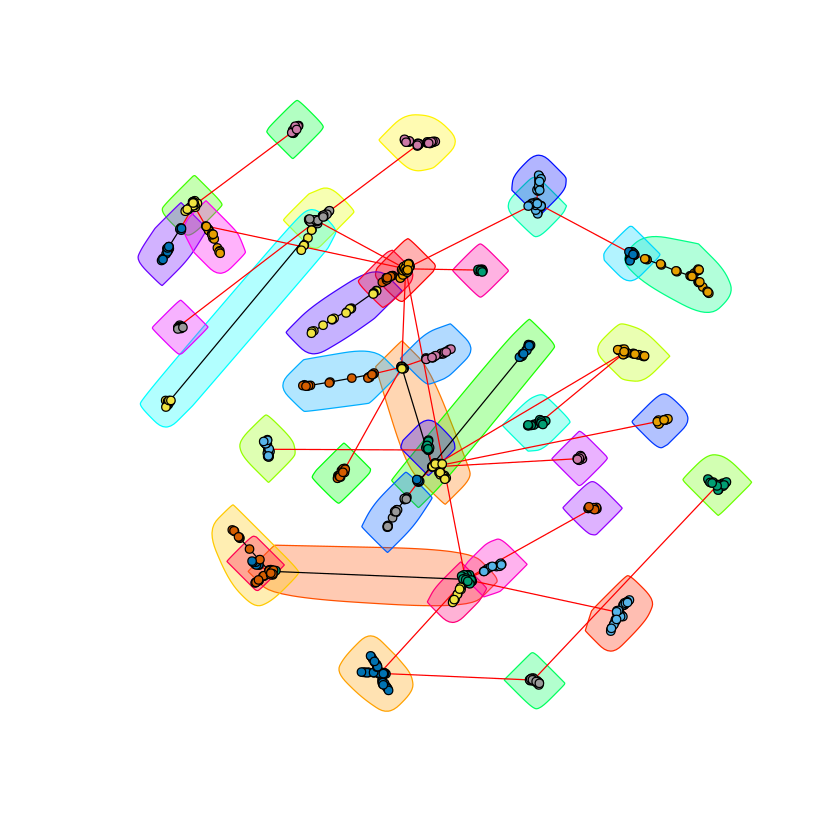

In [259]:
gh = sample_pa(1000, m = 1 , directed=FALSE)
g_communityh = fastgreedy.community(gh)
g_modularityh = modularity(g_communityh)
plot(g_communityh,gh,vertex.size=3, vertex.label=NA)
deg_h=degree(gh)
g_modularityh
is_connected(gh)



In [289]:
setEPS()
postscript("1_2_h1.eps")
plot(g_communityh,gh,vertex.size=3, vertex.label=NA)
dev.off()

Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“semi-transparency is not supported on this device: reported only once per page”


png 
  2

[1] 0.8347762

[1] FALSE

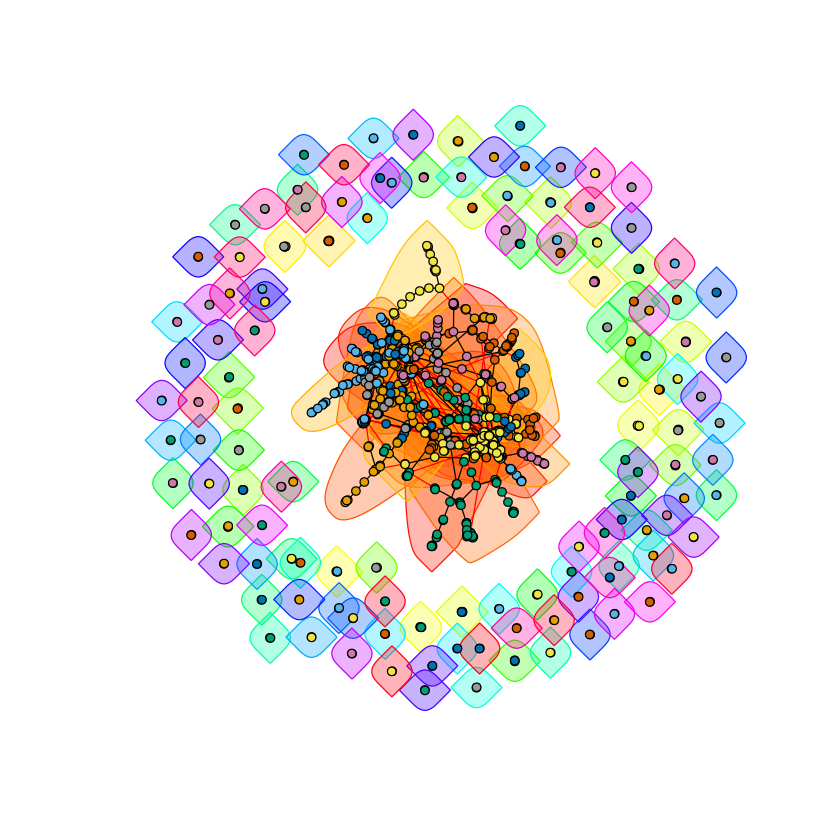

In [260]:
gh2 <- sample_degseq(deg_h, method="simple.no.multiple")
g_communityh2 = fastgreedy.community(gh2)
g_modularityh2 = modularity(g_communityh2)
plot(g_communityh2,gh2,vertex.size=3, vertex.label=NA)
g_modularityh2
is_connected(gh2)

In [290]:
setEPS()
postscript("1_2_h2.eps")
plot(g_communityh2,gh2,vertex.size=3, vertex.label=NA)
dev.off()

Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“semi-transparency is not supported on this device: reported only once per page”


png 
  2